# Data Science Academy<br>



## Análise Exploratória de Dados em Linguagem Python para a Área de Varejo

# 0. Introdução 

O objetivo deste projeto feito ao decorrer do meu curso de "Fundamentos de Linguagem Python Para Análise de Dados e Data Science" é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

## Perguntas de Negócio

As perguntas de negócio que serão respondidas neste projeto são as seguintes:

* **Pergunta de Negócio 1:** Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'
* **Pergunta de Negócio 2:** Qual o Total de Vendas Por Data do Pedido?
* **Pergunta de Negócio 3:** Qual o Total de Vendas por Estado?
* **Pergunta de Negócio 4:** Quais São as 10 Cidades com Maior Total de Vendas?
* **Pergunta de Negócio 5:** Qual Segmento Teve o Maior Total de Vendas?
* **Pergunta de Negócio 6:** Qual o Total de Vendas Por Segmento e Por Ano?
* **Pergunta de Negócio 7:** Quantas Vendas Receberiam 15% de Desconto?
* **Pergunta de Negócio 8:** Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
* **Pergunta de Negócio 9:** Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
* **Pergunta de Negócio 10:** Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?


## Dataset

O dataset usado neste projeto está disponível no seguinte link:

https://community.tableau.com/community/samples/sample-superstore-sales-excelxls

Foram feitas algumas alterações pela própria DSA, mas o arquivo usado no projeto está no Github.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## 1. Carregando os Dados

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(9700, 11)

In [3]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## 2. Análise Exploratória

In [4]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [5]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [6]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [7]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [8]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1: <br>

## Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [9]:
q1=df[df['Categoria']=='Office Supplies']
q1=q1.groupby(['Cidade']).sum()
q1=q1['Valor_Venda'].sort_values(ascending=False)
print(f'A cidade com maior Valor de Venda é {(q1.index[0]).upper()} com valor de {q1[0]}')

A cidade com maior Valor de Venda é NEW YORK CITY com valor de 68362.814


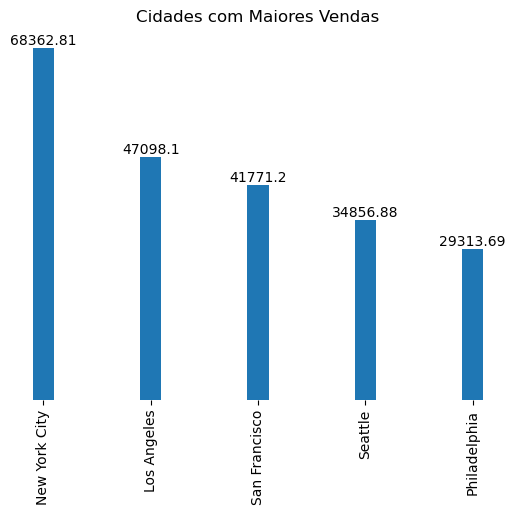

In [10]:
q1=q1.reset_index()
q1=q1[q1['Valor_Venda']>=(q1['Valor_Venda'].quantile(0.99))]


plt.bar(q1['Cidade'],q1['Valor_Venda'],width=0.2)
plt.title('Cidades com Maiores Vendas')

for index, value in enumerate(q1['Valor_Venda']):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')

plt.gca().axes.get_yaxis().set_visible(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.xticks(rotation=90)

plt.show()

Utilizando a bibliotecas de manipulação de dados "Pandas" podemos verificar que a cidade com maior valor é "New York City" com um valor de "68362.81"

## Pergunta de Negócio 2: <br>

## Qual o Total de Vendas Por Data do Pedido?



In [11]:
df['Data_Pedido']=pd.to_datetime(df['Data_Pedido'],format='%d/%m/%Y')
q2=df.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

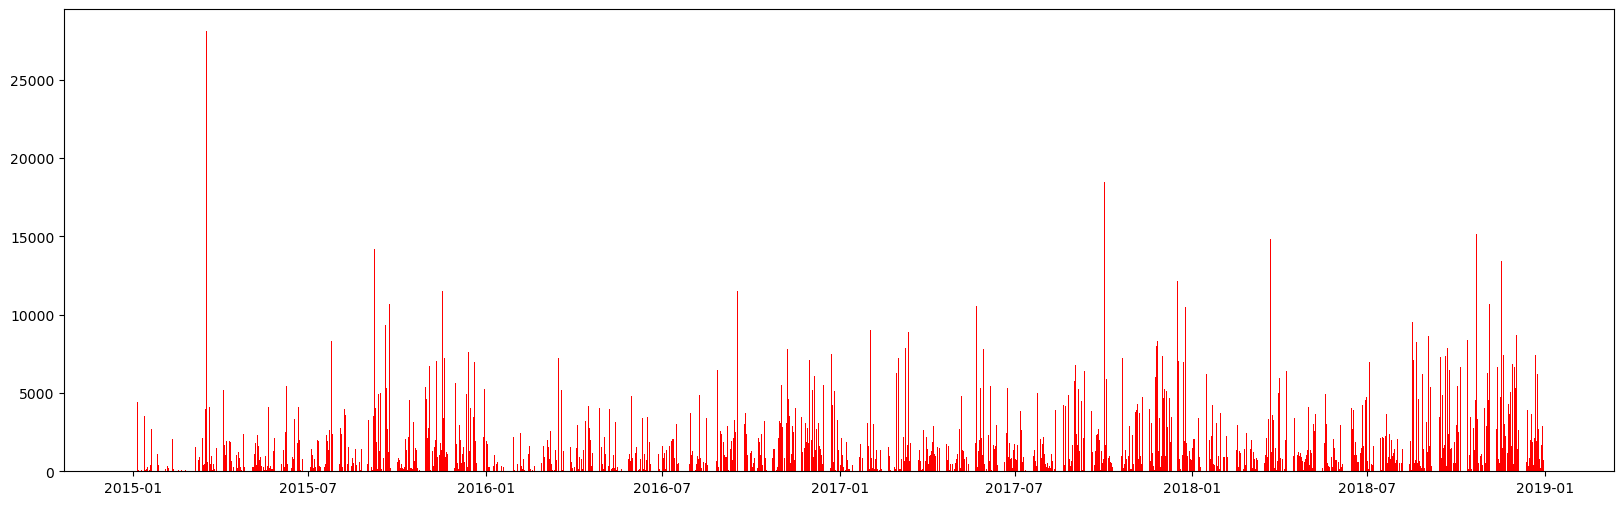

In [12]:
plt.figure(figsize=(20,6))
plt.bar('Data_Pedido','Valor_Venda',color='red',data=q2)
plt.show()

## Pergunta de Negócio 3:

## Qual o Total de Vendas por Estado?


In [13]:
# Agrupamos por estado e calculamos o total de vendas
q3=df.groupby('Estado')['Valor_Venda'].sum().reset_index()

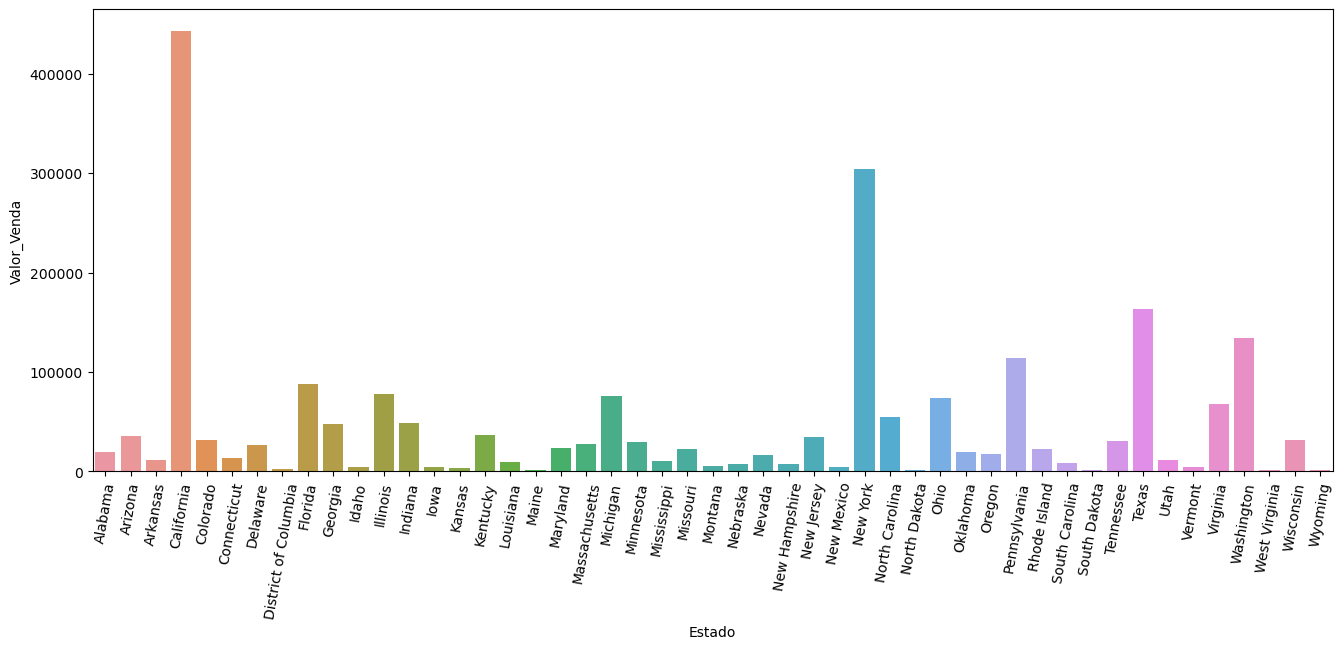

In [14]:
# Plot
plt.figure(figsize=(16, 6))
sns.barplot(x='Estado', y='Valor_Venda', data=q3, dodge=False)

plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 4:

## Quais São as 10 Cidades com Maior Total de Vendas?



In [15]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
q4=df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
ascending = False)
q4=q4.head(10)

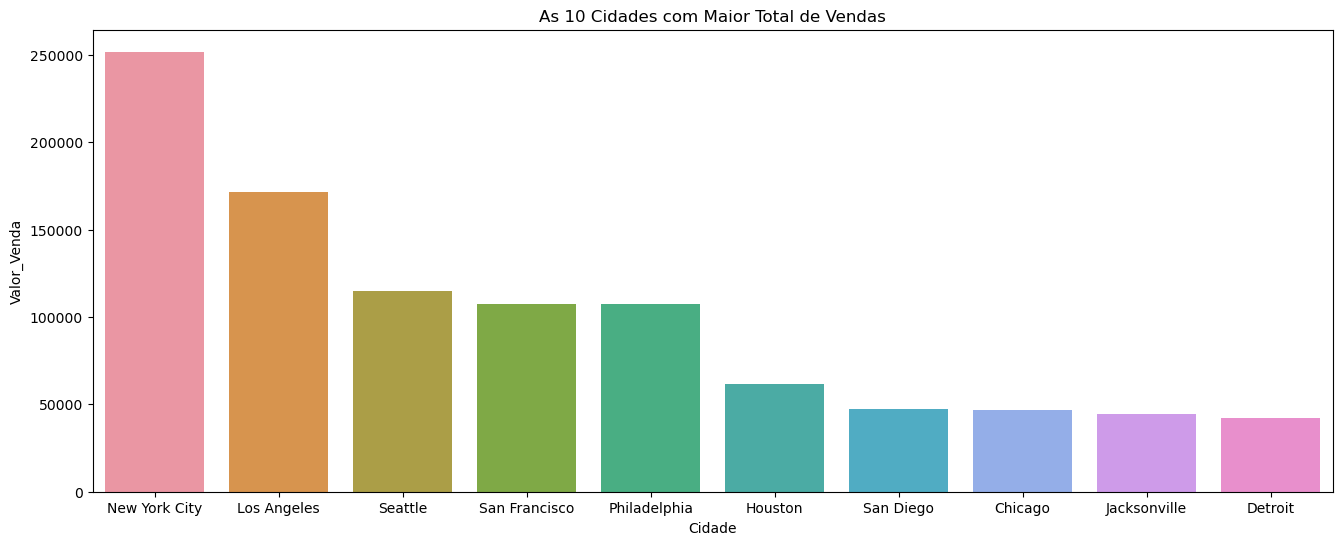

In [16]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data=q4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?


In [17]:
# Agrupamos por segmento e calculamos o total de vendas
q5= df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by ='Valor_Venda',
                                                                                      ascending = False)

#Tirando a notação cientifica que o numero estava! (1.133834e+06) -> 1133834.33
q5['Valor_Venda']=q5['Valor_Venda'].apply(lambda x: float(f'{x:.2f}'))
q5.head()

,Segmento,Valor_Venda
0,Consumer,1133834.33
1,Corporate,679232.19
2,Home Office,422491.43


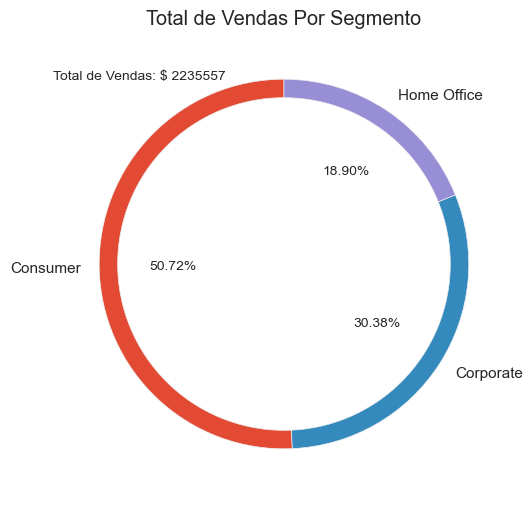

In [55]:

# Tamanho da figura
plt.figure(figsize = (16, 6))
plt.style.use('ggplot')
# Gráfico de pizza
plt.pie(q5['Valor_Venda'], 
        labels = q5['Segmento'],
        autopct='%.2f%%',
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.90, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(q5['Valor_Venda']))), xy = (-1.25, 1))
plt.title('Total de Vendas Por Segmento')
plt.show()

# Pergunta de Negócio 6:

## Qual o Total de Vendas Por Segmento e Por Ano?

In [19]:
#Criamos um Coluna nova so para os anos
df['Ano']=df['Data_Pedido'].dt.year
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017


In [20]:
# Total de vendas por segmento e por ano
q6=df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()
q6

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


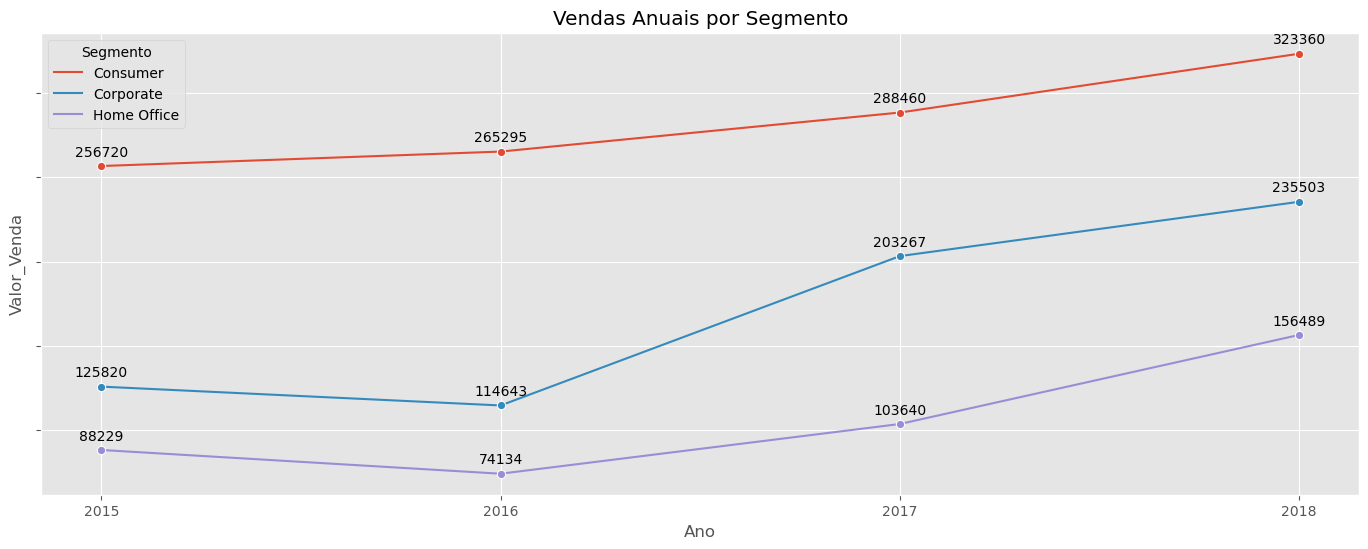

In [21]:
plt.figure(figsize=(17,6))

ax = sns.lineplot(data=q6, x='Ano', y='Valor_Venda', hue='Segmento', marker='o')
# Adicionando os valores acima dos marcadores
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y:.0f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', 
                    ha='center', va='bottom')
# Ajustando os ticks do eixo x para mostrar apenas anos inteiros
ax.set_yticklabels([])
plt.xticks(df['Ano'].unique())
# Adicionando título e rótulos aos eixos
plt.title('Vendas Anuais por Segmento')
plt.show()



## Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [22]:
# Cria uma nova coluna de acordo com a regra definida acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1


In [23]:
# Total por cada valor da variável
df['Desconto'].value_counts(1)

Desconto
0.10    0.952887
0.15    0.047113
Name: proportion, dtype: float64

In [24]:
df['Desconto'].value_counts(0)

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [25]:
print('No Total 457 Vendas Receberiam Desconto de 15%, cerca de 4% dos valores')

No Total 457 Vendas Receberiam Desconto de 15%, cerca de 4% dos valores


## Pergunta de Negócio 8 :

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [26]:
Média_antes=df['Valor_Venda'].mean()
Média_antes

230.4698922371134

In [29]:
#Se aplicamos apenas o 15%, precisamos retirar o desconto de 10% então vou deixar 1 para não multiplicarmos
df['Desconto15']=np.where(df['Desconto'] == 0.1,1,0.15)

df['Média_Depois']=df['Valor_Venda']-(df['Valor_Venda']*df['Desconto15'])
média_depois=df['Média_Depois'].mean()

In [30]:
resultado=Média_antes-média_depois
print(resultado)

145.69937720000001


# Pergunta de Negócio 9 

## Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?



In [35]:
# Extraímos o mês e gravamos em uma nova variável
df['Mes'] = df['Data_Pedido'].dt.month
df[['Mes','Valor_Venda']]

,Mes,Valor_Venda
0,11,261.9600
1,11,731.9400
2,6,14.6200
3,10,957.5775
4,10,22.3680
...,...,...
9695,12,22.8300
9696,12,54.3200
9697,12,196.7760
9698,10,3.6200


In [36]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
q9= df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.mean])
q9

mean
Ano  Mes Segmento               
2015 1   Consumer     146.736787
         Corporate    130.886769
         Home Office  329.855882
     2   Consumer     117.327926
         Corporate     69.235333
...                          ...
2018 11  Corporate    341.215278
         Home Office  247.519423
     12  Consumer     183.616244
         Corporate    153.167403
         Home Office  224.523983

[144 rows x 1 columns]

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

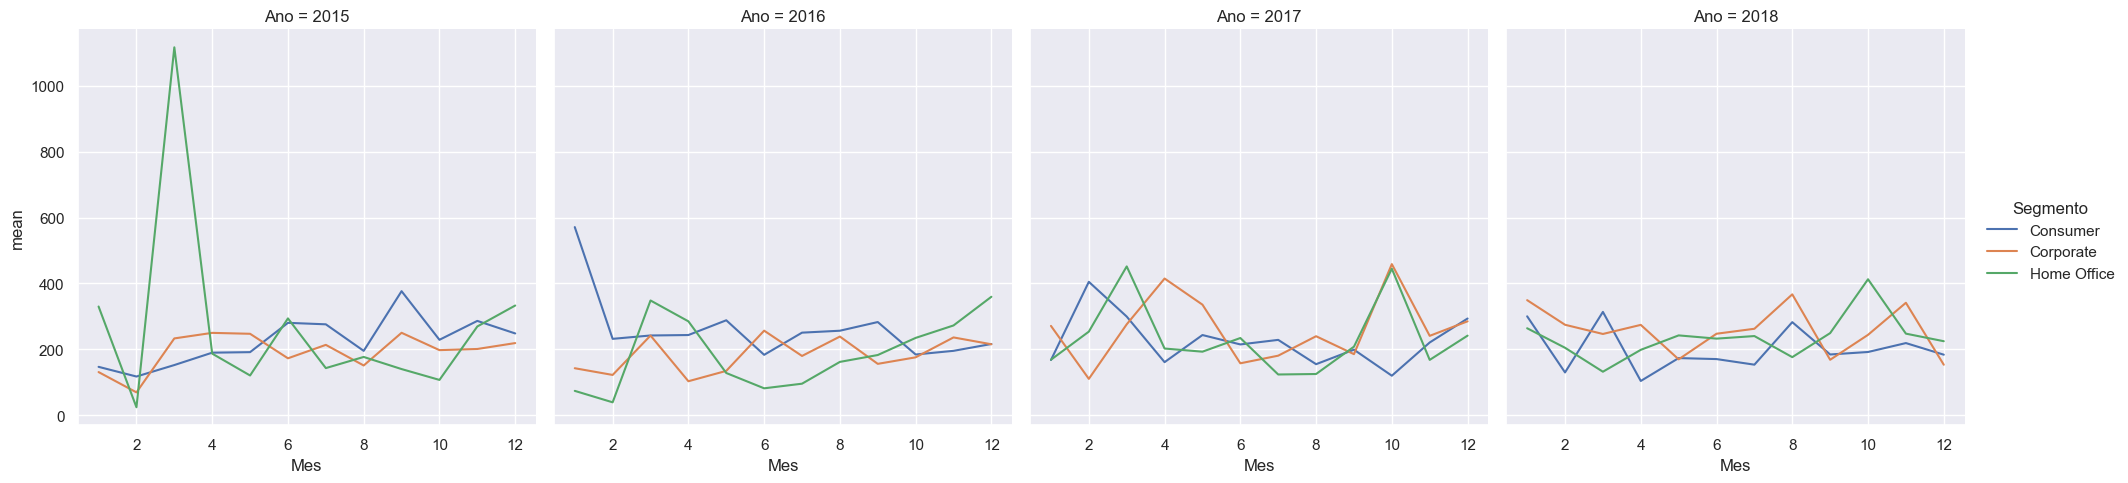

In [41]:
# Vamos extrair os níveis
anos = q9.index.get_level_values(0)
meses =q9.index.get_level_values(1)
segmentos = q9.index.get_level_values(2)

# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = q9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

# Pergunta de Negócio 10 : <br>

## Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 



In [42]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
q10 = df.groupby(['Categoria',
                  'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                        ascending = False).head(12)

In [44]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
q10=q10[['Valor_Venda']].astype(int).sort_values(by ='Categoria').reset_index()
# Dataframe com categorias e subcategorias
q10

Obs: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [47]:
# Criamos outro dataframe somente com os totais por categoria
q10_cat = q10.groupby('Categoria').sum(numeric_only = True).reset_index()
# Dataframe com categorias 
q10_cat

In [49]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

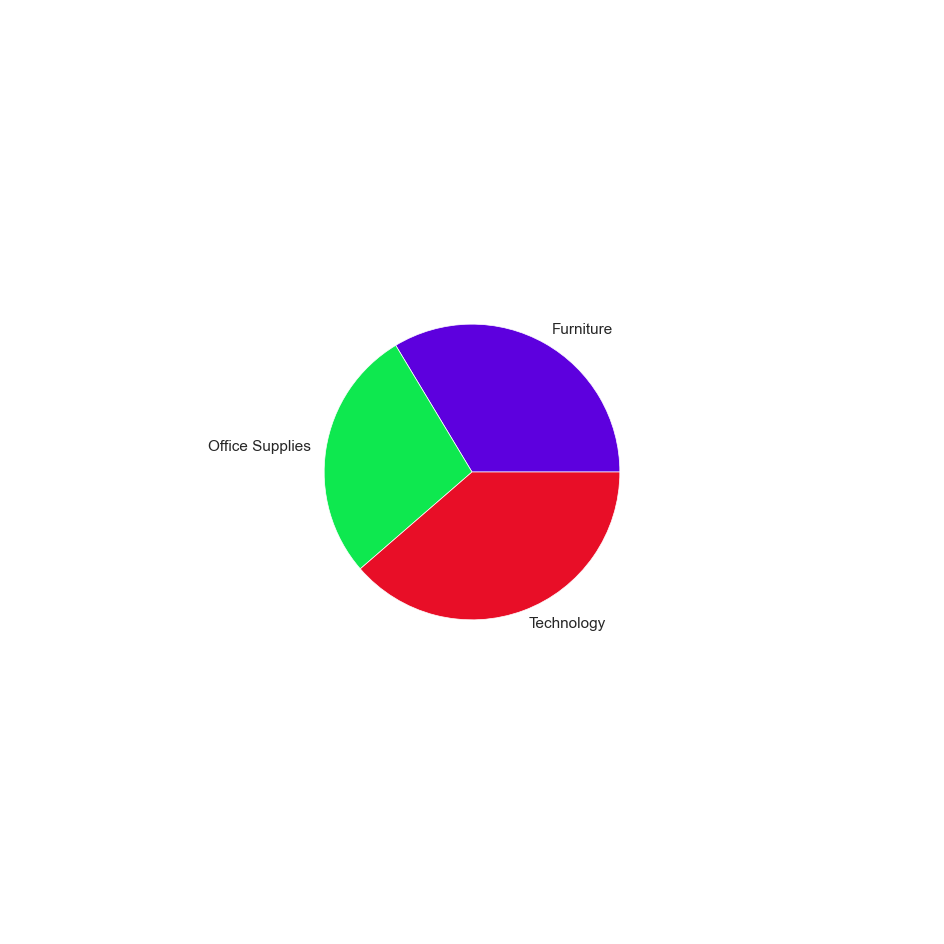

In [60]:
plt.figure(figsize=(18,12))
plt.pie(q10_cat['Valor_Venda'],
        radius = 0.4,
        labels = q10_cat['Categoria'],
        wedgeprops = dict(edgecolor = 'white'),
        colors = cores_categorias)

plt.show()

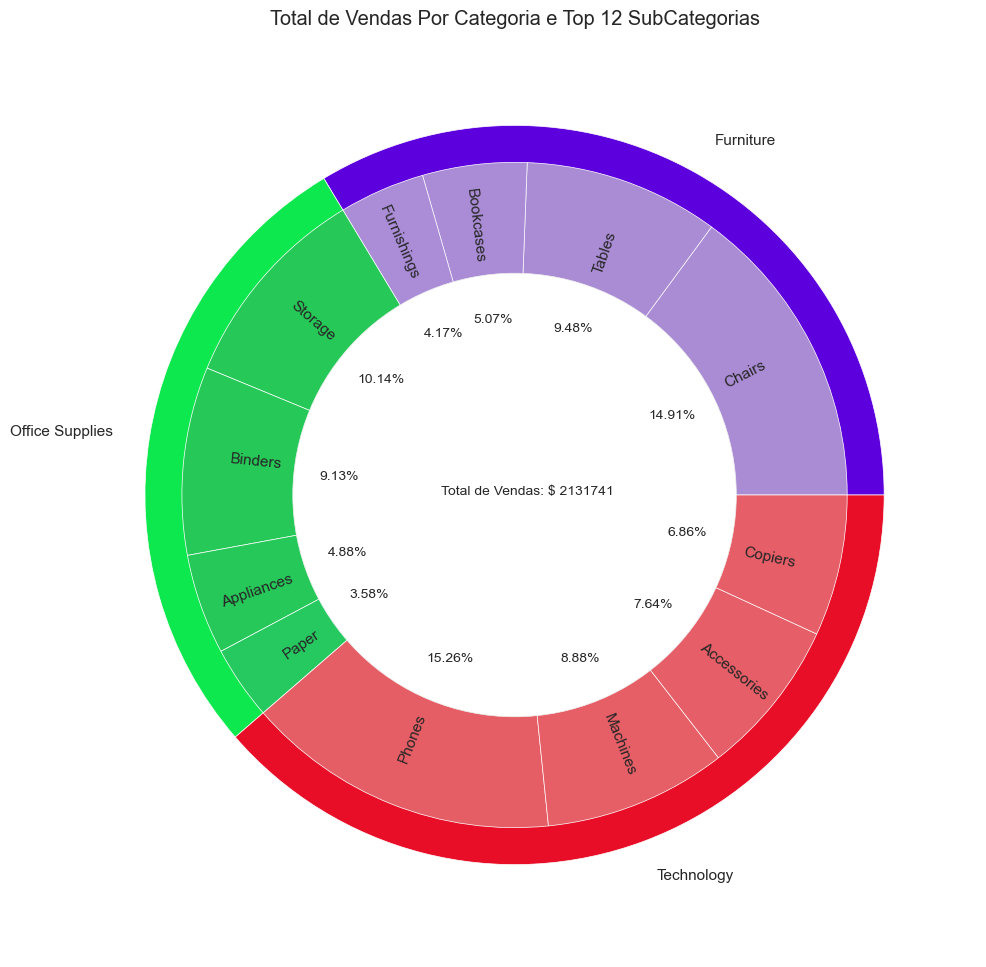

In [59]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(q10_cat['Valor_Venda'], 
            radius = 1,
            labels = q10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(q10['Valor_Venda'],
            radius = 0.9,
            labels = q10['SubCategoria'],
            autopct = "%.2f%%",
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(q10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()